<center><H3>Create training samples<H3/><center>

In [1]:
import pandas as pd
import random

In [2]:
training = pd.read_csv("training.csv")

In [3]:
training = training[['utterance','intension']]

In [4]:
training

,utterance,intension
0,which lectures are there on wednesday at 2,Schedule
1,is there a lecture at 16 on monday,Schedule
2,on sunday at 18 which lectures are there,Schedule
3,on tuesday at 22 which lectures are there,Schedule
4,hello where is room 7 located,Location
...,...,...
1567,hello how do we get to room 2,Location
1568,is there a lecture on saturday at 20,Schedule
1569,hello where is room 9 located,Location
1570,hey how do you get to room 7,Location


<center><H3>Use BOW for Training and Testing<H3/><center>

In [5]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

## scipy library
from scipy.sparse import dok_matrix
from scipy.stats import sem

## sklearn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std


from matplotlib import pyplot as plt

## math library
import math

from termcolor import colored

In [6]:
voc = ["which", 'what','time','is', 'there', 'have','lecture', 'scheduled','class','where', 'address','how', 'get','find','room']
def create_features(data):
    features = []
    for sample in data:
        tokens = sample.split(" ")
        feature = []
        for word in voc:
            feature.append(sum([1 for token in tokens if word==token]))
        features.append(feature)
    return features

In [7]:
X = create_features(training['utterance'])
y = training['intension']

In [8]:
## define classifiers
classifiers = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SupportedVectorMachine": svm.SVC(probability=True),
    "LogisticRegression": LogisticRegression()
}

In [9]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats,clf):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

KNeighborsClassifier
>1 mean=0.99809 se=0.001
>2 mean=0.99809 se=0.001
>3 mean=0.99809 se=0.001
>4 mean=0.99809 se=0.000
>5 mean=0.99809 se=0.000
>6 mean=0.99809 se=0.000
>7 mean=0.99809 se=0.000
>8 mean=0.99809 se=0.000
>9 mean=0.99809 se=0.000
>10 mean=0.99809 se=0.000


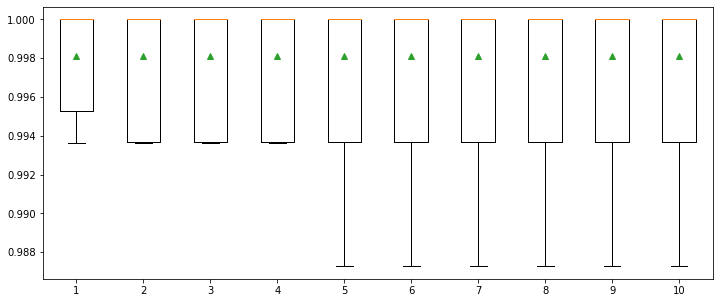



DecisionTreeClassifier
>1 mean=1.00000 se=0.000
>2 mean=1.00000 se=0.000
>3 mean=1.00000 se=0.000
>4 mean=1.00000 se=0.000
>5 mean=1.00000 se=0.000
>6 mean=1.00000 se=0.000
>7 mean=1.00000 se=0.000
>8 mean=1.00000 se=0.000
>9 mean=1.00000 se=0.000
>10 mean=1.00000 se=0.000


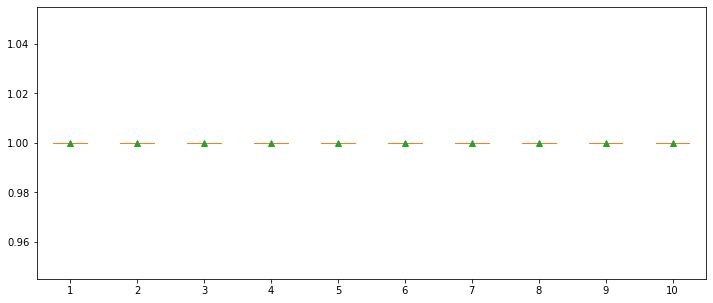



RandomForestClassifier
>1 mean=1.00000 se=0.000
>2 mean=1.00000 se=0.000
>3 mean=1.00000 se=0.000
>4 mean=1.00000 se=0.000
>5 mean=1.00000 se=0.000
>6 mean=1.00000 se=0.000
>7 mean=1.00000 se=0.000
>8 mean=1.00000 se=0.000
>9 mean=1.00000 se=0.000
>10 mean=1.00000 se=0.000


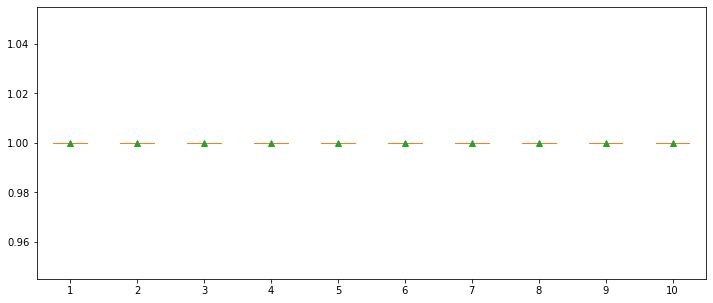



SupportedVectorMachine
>1 mean=1.00000 se=0.000
>2 mean=1.00000 se=0.000
>3 mean=1.00000 se=0.000
>4 mean=1.00000 se=0.000
>5 mean=0.99975 se=0.000
>6 mean=0.99979 se=0.000
>7 mean=0.99982 se=0.000
>8 mean=0.99968 se=0.000
>9 mean=0.99972 se=0.000
>10 mean=0.99975 se=0.000


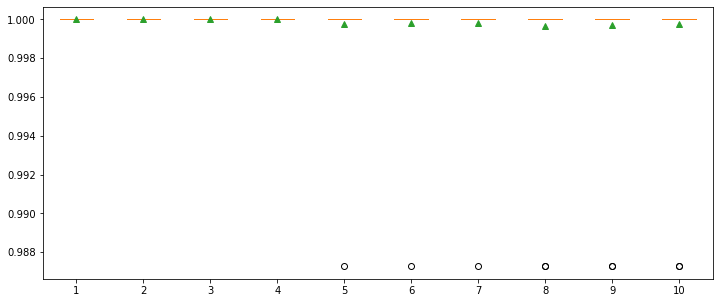



LogisticRegression
>1 mean=0.99809 se=0.001
>2 mean=0.99809 se=0.001
>3 mean=0.99809 se=0.001
>4 mean=0.99809 se=0.000
>5 mean=0.99809 se=0.000
>6 mean=0.99809 se=0.000
>7 mean=0.99809 se=0.000
>8 mean=0.99809 se=0.000
>9 mean=0.99809 se=0.000
>10 mean=0.99809 se=0.000


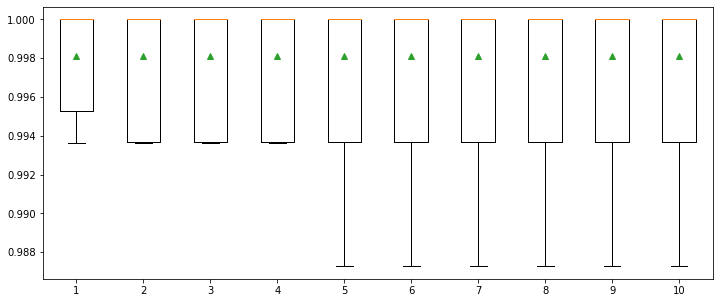

In [11]:
repeats = range(1,11)
results = []
for key in classifiers.keys():
    clf = classifiers[key]
    print(colored(key, 'green', attrs=['bold']))
    for r in repeats:
        scores = evaluate_model(X, y, r, clf)
        print('>%d mean=%.5f se=%.3f' % (r, mean(scores), sem(scores)))
        results.append(scores)
    # plot the results
    plt.figure(figsize=(12,5))
    plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
    plt.show()
    results = []
    print("\n")

From the results above, all classifiers gave nearly perfect accuracy.

<center><H3>Test Unknown Utterances<H3/><center>

In [12]:
utterance_unseen = pd.read_csv('utterances_unseen.csv')
utterance_unseen = utterance_unseen.loc[utterance_unseen['intension']!='Greeting']

In [13]:
utterance_unseen.head(5)

,utterance,intension
0,What is the address of the lecture at 9,Location
1,What do we have at 12,Schedule
2,What time is the lecture on Tuesday,Schedule
3,"Hello, does she have a lecture on Sunday",Schedule
4,How do we find the address for lecture at 11,Location


In [14]:
X_unseen = utterance_unseen['utterance']
y_unseen = utterance_unseen['intension']

In [15]:
features_unseen = create_features(X_unseen)

In [18]:
results = []
for key in classifiers.keys():
    clf = classifiers[key]
    clf.fit(X, y)
    score = clf.score(features_unseen, y_unseen)
    results.append([key, score])
df_results = pd.DataFrame(results, columns=['classifier', 'accuracy'])

In [19]:
df_results

,classifier,accuracy
0,KNeighborsClassifier,0.3125
1,DecisionTreeClassifier,0.2750
2,RandomForestClassifier,0.2375
3,SupportedVectorMachine,0.3500
4,LogisticRegression,0.5625


<center><H3>Define Function for Intent Classification<H3/><center>

In [20]:
def get_intent(question):
    clf = LogisticRegression()
    clf.fit(X, y)
    feature = create_features(question)
    intent = clf.predict(feature)
    return intent

<center><H3>Slot Filling<H3/><center>

In [21]:
import spacy
from dateparser import parse
from dateparser.search import search_dates
import re

In [22]:
question = ["which lecture is there on 03/04 at 13.45"]
# question = ["where do we get to room 3"]

In [23]:
# define dict for all three intents
schedule = {"date": "none", "day": "none", "time": "none"}
location = {"room":"none"}
greeting = {"greeting":['hi','hello','hey']}

In [24]:
# decide the intent of the inqury
intent = get_intent(question)[0]

In [33]:
print(intent)

Schedule


In [26]:
def match_re(exp, string):
    return bool(re.match(exp, string))

In [27]:
# fill in slots of Schedule
if intent == "Schedule":
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(question[0])
    nn = {}
    for ent in doc.ents:
        nn[ent.text]=ent.label_
    # extract date
    day_re = r'[Mm]on(day)?|[Tt]ues(day)?|[Ww]ednes(day)?|[Ff]ri(day)?|[Ss]atur(day)?|[Ss]un(day)?'
    date_re = r'[0-9]*\/[0-9]*(\/[0-9]*)?'
    result1 = [ent for ent in nn.keys() if match_re(date_re, ent)==True]
    result2 = [ent for ent in nn.keys() if match_re(day_re, ent)==True]
    if "today" in nn.keys() or "Today" in nn.keys():
        date = parse("today").strftime("%d/%m/%y")
        schedule["date"]=date
    elif "tomorrow" in nn.keys() or "Tomorrow" in nn.keys():
        date = parse("tomorrow").strftime("%d/%m/%y")
        schedule["date"]=date
    elif len(result1)>=1:
        date = parse(result1[-1]).strftime("%d/%m/%y")
        schedule["date"]=date
    elif len(result2)>=1:
        date = parse(result2[-1]).strftime("%d/%m/%y")
        schedule["date"]=date
    # extract day
    week_days = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
    weekday = week_days[parse(schedule["date"]).weekday()-1]
    schedule['day'] = weekday
    # extract time
    time_re = "[0-9]+[:.][0-9]+"
    result = [ent for ent in nn.keys() if match_re(time_re, ent)==True]
    if len(result)>=1:
            time = parse(result[-1]).strftime("%H:%M")
            schedule["time"]=time
    
# fill in slots of location
elif intent == "Location":
    loc_re = "[Rr]oom\s*[0-9]+"
    loc = None
    for i in range(0,len(question[0])):
        
        for j in range(i+1,len(question[0])+1):
            if match_re(loc_re,question[0][i:j]):
                loc = re.sub("[^0-9]","",question[0][i:j])  
                location['room'] = loc
                break
    

<center><H3>Find Matching and Generate Answer<H3/><center>

In [28]:
timetable = pd.read_csv("lectures.csv")
map = pd.read_csv("locations.csv")

In [29]:
def find_matching_schedule(schedule):
    matching = [timetable.loc[i]['Course'] for i in range(0,len(timetable)) if timetable.loc[i]['Date']==schedule["date"] and timetable.loc[i]['Time']==schedule['time']]
    return matching

In [30]:
def find_matching_location(location):
    matching = [[str(i), str(map.loc[i]['Floor']), str(map.loc[i]["Extra"])] for i in range(0,len(map)) if str(map.loc[i]['Room'])==location["room"]]
    return matching

In [34]:
if intent=="Schedule":
    lecture = find_matching_schedule(schedule)
    if len(lecture)>=1:
        answer = "On {0} at {1}, you have a {2}".format(schedule['day'],schedule['time'],'/'.join(lecture[:]))
    else:
        answer = "On {0} at {1}, you have no lectures".format(schedule['day'],schedule['time'])
elif intent=="Location":
    address = find_matching_location(location)[0]
    address = [address[i] for i in range(0,len(address)) if address[i]!="nan"]
    if len(address)>2:
        answer = "Room {0} is on Floor {1} {2}".format(address[0], address[1], address[2])
    elif len(address)==2:
        answer = "Room {0} is on Floor {1}".format(address[0], address[1])
    else:
        answer = "There is no room {0}".format(address[0])

# fill in slots of greeting           
elif question[0].lower() in ['hi','hello','hey']:
    answer = greeting['greeting'][random.randint(2)]

In [32]:
print(answer)

On Friday at 13:45, you have no lectures
